In [131]:
import pandas as pd

In [132]:
df = pd.read_csv("C:\Sowmya\Personal\PYTORCH\Pytorch_stuffs\houseprice.csv")
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [133]:
df = pd.read_csv("C:\Sowmya\Personal\PYTORCH\Pytorch_stuffs\houseprice.csv", usecols=["SalePrice", "MSSubClass", 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'LotShape']).dropna()

In [134]:
df.shape

(1201, 10)

In [135]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [136]:
for i in df.columns:
    print(f"Column name : {i}, unique values are {len(df[i].unique())}")

Column name : MSSubClass, unique values are 15
Column name : MSZoning, unique values are 5
Column name : LotFrontage, unique values are 110
Column name : LotArea, unique values are 869
Column name : Street, unique values are 2
Column name : LotShape, unique values are 4
Column name : YearBuilt, unique values are 112
Column name : 1stFlrSF, unique values are 678
Column name : 2ndFlrSF, unique values are 368
Column name : SalePrice, unique values are 597


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [138]:
from datetime import datetime

datetime.now().year

2024

In [139]:
df['Total years'] = datetime.now().year - df['YearBuilt']

In [140]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [141]:
df.drop("YearBuilt", axis=1, inplace=True)

In [142]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total years'],
      dtype='object')

In [143]:
cat_features = ["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature = "SalePrice"

In [144]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [145]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [146]:
from sklearn.preprocessing import LabelEncoder

lbl_encoders = {}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [147]:
lbl_encoders

{'MSSubClass': LabelEncoder(),
 'MSZoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'LotShape': LabelEncoder()}

In [148]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24


In [149]:
import numpy as np

# Stacking and converting into Tensors
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [150]:
# Convert numpy to tensors
import torch
cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [151]:
# Create contineous features
cont_features = []

for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape", "SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [152]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total years']

In [153]:
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [154]:
cont_values.dtype

torch.float32

In [155]:
# Dependent feature
y = torch.tensor(df['SalePrice'].values, dtype=torch.float)
y

tensor([208500., 181500., 223500.,  ..., 266500., 142125., 147500.])

In [156]:
y = torch.tensor(df['SalePrice'].values, dtype=torch.float).reshape(-1, 1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [160]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [161]:
df.shape

(1201, 10)

# Embedding size for categorical columns

In [162]:
cat_dims = [len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [164]:
## Thumb Rule: Output dimensio should be set based on the input dimension (min(50, feature dimension/2))
embedding_dim = [(x, min(50, (x+1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

# =================== Preprocessing step completed ===========================

In [165]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed_representation = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [166]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [167]:
cat_features[:4]

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [168]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i, e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:, i]))

In [169]:
embedding_val

[tensor([[-0.9116,  1.1317, -0.0168,  ...,  0.0714, -1.2682,  1.1747],
         [ 0.6315, -0.1799,  0.3308,  ..., -1.0245, -0.2796,  1.0294],
         [-0.9116,  1.1317, -0.0168,  ...,  0.0714, -1.2682,  1.1747],
         ...,
         [-1.9004, -1.2638,  2.6713,  ..., -1.2084, -1.4775,  0.2661],
         [ 0.6315, -0.1799,  0.3308,  ..., -1.0245, -0.2796,  1.0294],
         [ 0.6315, -0.1799,  0.3308,  ..., -1.0245, -0.2796,  1.0294]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.0572,  1.1361, -1.1297],
         [ 0.0572,  1.1361, -1.1297],
         [ 0.0572,  1.1361, -1.1297],
         ...,
         [ 0.0572,  1.1361, -1.1297],
         [ 0.0572,  1.1361, -1.1297],
         [ 0.0572,  1.1361, -1.1297]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.6653],
         [0.6653],
         [0.6653],
         ...,
         [0.6653],
         [0.6653],
         [0.6653]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.2910, 2.2201],
         [1.2910, 2.2201],
         [1.1728, 0.6808],
     

In [170]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.9116,  1.1317, -0.0168,  ...,  0.6653,  1.2910,  2.2201],
        [ 0.6315, -0.1799,  0.3308,  ...,  0.6653,  1.2910,  2.2201],
        [-0.9116,  1.1317, -0.0168,  ...,  0.6653,  1.1728,  0.6808],
        ...,
        [-1.9004, -1.2638,  2.6713,  ...,  0.6653,  1.2910,  2.2201],
        [ 0.6315, -0.1799,  0.3308,  ...,  0.6653,  1.2910,  2.2201],
        [ 0.6315, -0.1799,  0.3308,  ...,  0.6653,  1.2910,  2.2201]],
       grad_fn=<CatBackward0>)

In [171]:
# implement dropout

dropout = nn.Dropout(.4)

In [172]:
final_embed = dropout(z)
final_embed

tensor([[-0.0000,  1.8862, -0.0000,  ...,  0.0000,  0.0000,  3.7001],
        [ 0.0000, -0.0000,  0.5513,  ...,  1.1089,  0.0000,  0.0000],
        [-1.5193,  1.8862, -0.0280,  ...,  1.1089,  0.0000,  0.0000],
        ...,
        [-3.1673, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  3.7001],
        [ 0.0000, -0.2999,  0.5513,  ...,  1.1089,  2.1517,  0.0000],
        [ 0.0000, -0.2999,  0.5513,  ...,  0.0000,  2.1517,  3.7001]],
       grad_fn=<MulBackward0>)

In [173]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp, out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
        
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [174]:
len(cont_features)

5

In [175]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100, 50], p=0.5)

In [176]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.5, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

Define Loss and Optimizer

In [177]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [178]:
df.shape

(1201, 10)

In [179]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [180]:
cont_values.shape

torch.Size([1201, 5])

In [181]:
batch_size = 1200

test_size = int(batch_size*0.15)

train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]

train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [182]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [183]:
epochs = 2000
final_losses = []

for i in range(epochs):
    i = i+1
    y_pred = model(train_categorical, train_cont)
    loss = torch.sqrt(loss_function(y_pred, y_train)) ## RMSE

    final_losses.append(loss)
    if i%10 == 1:
        print(f"Epoch number: {i} and the loss: {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 200496.78125
Epoch number: 11 and the loss: 200493.65625
Epoch number: 21 and the loss: 200489.265625
Epoch number: 31 and the loss: 200482.890625
Epoch number: 41 and the loss: 200473.875
Epoch number: 51 and the loss: 200461.765625
Epoch number: 61 and the loss: 200446.96875
Epoch number: 71 and the loss: 200430.09375
Epoch number: 81 and the loss: 200409.25
Epoch number: 91 and the loss: 200384.9375
Epoch number: 101 and the loss: 200356.484375
Epoch number: 111 and the loss: 200324.296875
Epoch number: 121 and the loss: 200293.015625
Epoch number: 131 and the loss: 200253.515625
Epoch number: 141 and the loss: 200208.8125
Epoch number: 151 and the loss: 200162.46875
Epoch number: 161 and the loss: 200116.03125
Epoch number: 171 and the loss: 200063.953125
Epoch number: 181 and the loss: 200009.9375
Epoch number: 191 and the loss: 199951.625
Epoch number: 201 and the loss: 199882.5
Epoch number: 211 and the loss: 199822.75
Epoch number: 221 and the loss

Text(0.5, 0, 'epochs')

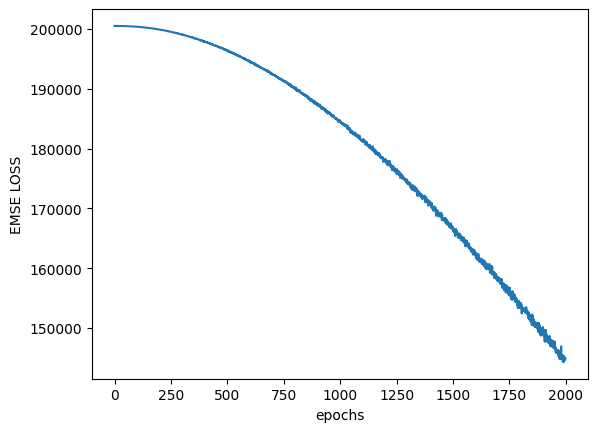

In [185]:
final_losses = [loss.detach().numpy() if hasattr(loss, 'detach') else loss for loss in final_losses]

import matplotlib.pyplot as plt

plt.plot(range(epochs), final_losses)
plt.ylabel("EMSE LOSS")
plt.xlabel("epochs")

In [186]:
# Validate the test data

y_pred = ""
with torch.no_grad():
    y_pred = model(test_categorical, test_cont)
    loss = torch.sqrt(loss_function(y_pred, y_test))
print(f"RMSE: {loss}")

RMSE: 139563.875


In [188]:
data_verify = pd.DataFrame(y_test.tolist(), columns=["Test"])

In [189]:
data_predicted = pd.DataFrame(y_pred.tolist(), columns=["Prediction"])

In [191]:
data_predicted[:10]

,Prediction
0,44052.769531
1,31064.375000
2,33538.335938
3,89223.781250
4,37991.621094
5,62336.996094
6,56611.121094
7,101960.671875
8,26918.183594
9,129863.234375


In [192]:
final_output = pd.concat([data_verify, data_predicted], axis=1)
final_output['Difference'] = final_output['Test'] - final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,44052.769531,85947.230469
1,138887.0,31064.375000,107822.625000
2,175500.0,33538.335938,141961.664062
3,195000.0,89223.781250,105776.218750
4,142500.0,37991.621094,104508.378906


In [193]:
torch.save(model, 'HousePrice.pt')

In [194]:
torch.save(model.state_dict(), 'HouseWeights.pt')

In [195]:
# Loading the save model

embs_size = [(15, 8), (5,3), (2,1), (4,2)]
model1 = FeedForwardNN(embs_size, 5, 1, [100, 50], p=0.4)

In [196]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

C:\Users\2260927\AppData\Local\Temp\ipykernel_14364\2229105223.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load('HouseWeights.pt'))


<All keys matched successfully>

In [198]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)